In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

In [3]:
from monary import Monary
import numpy as np
import pandas as pd
import bson
from monary.monary import mvoid_to_bson_id
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cluster
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction import DictVectorizer

In [4]:
mon = Monary("127.0.0.1")

# PA dataframe

In [5]:
columns = ["User_"+str(i) for i in range(31)]
array = mon.query(
    "newbase1",
    "private_area",
    {"_id":mvoid_to_bson_id('574840a9dfb7b83c907b35de')},
    ["members.%d.person._ref.$id" % i for i in range(31)],
    ["id" for i in range(31)]
    )
df_pa = np.matrix(array).transpose() 
#df_pa = pd.DataFrame(df_pa, columns=columns)

In [6]:
list_users_pse = []
for i in range(31):
    list_users_pse.append(mvoid_to_bson_id(df_pa[0,i]))

In [7]:
len(list_users_pse)

31

# Atlas List

In [9]:
arrays = mon.query(
"newbase1", # database name
"atlas", # collection name
{
        "name":"Probability and Statistics for Economic Analysis"
    }, # query spec
["content.nodes.%d.object._ref.$id"%i for i in range(5)], # field names (in Mongo record)
[
        "id" for i in range(5)] # Monary field types (see below)
)
df_atlas = np.matrix(arrays).transpose() 

In [10]:
list_atlas_prob_stat = []
for i in range(5):
    list_atlas_prob_stat.append(mvoid_to_bson_id(df_atlas[0,i]))

In [11]:
list_atlas_prob_stat

[ObjectId('57484755dfb7b83c907b77c5'),
 ObjectId('5748475fdfb7b83c907b797b'),
 ObjectId('57485589dfb7b83ecce1c292'),
 ObjectId('57f3dfbcd31463000b21a723'),
 ObjectId('57f3e1767357a5000b6afa02')]

# Map List

In [102]:
arrays = mon.query(
"newbase1", # database name
"map", # collection name
{
        "_id":{"$in":list_atlas_prob_stat}
    }, # query spec
["name"]+["graph.nodes.%d.object"%i for i in range(13)], # field names (in Mongo record)
["string:100"]+[
        "id" for i in range(13)] # Monary field types (see below)
)
df_map = np.matrix(arrays).transpose() 

In [89]:
from bson import ObjectId

In [120]:
mvoid_to_bson_id(df_map[2,1])

ObjectId('579632509288d4000b36ae66')

In [112]:
dictionary = {}
for i in range(len(list_atlas_prob_stat)):
    dictionary[df_map[i,0]]=[mvoid_to_bson_id(a)   for a in df_map.A[i,1:] if mvoid_to_bson_id(a) != mvoid_to_bson_id('000000000000000000000000')]

In [113]:
dictionary
shape = [len(a) for a in dictionary.values()]
shape

{'1. Properties of random samples': [ObjectId('579632509288d4000b36ae66'),
  ObjectId('579633069288d4000b36d9c0'),
  ObjectId('579633bc9288d4000b36f648'),
  ObjectId('579633819288d4000b36eae5'),
  ObjectId('579633a39288d4000b36f096'),
  ObjectId('579633209288d4000b36df6e'),
  ObjectId('57b5b38651f2db000b2f2527'),
  ObjectId('5796418e630267000bbe820d'),
  ObjectId('57964209630267000bbea3fa'),
  ObjectId('5796428a630267000bbf07bc'),
  ObjectId('579642a8630267000bbf19b2'),
  ObjectId('5796432e630267000bbf30ad'),
  ObjectId('5797399f630267004d22b8a1')],
 '2. Point estimation': [ObjectId('57973251630267004d21e2cf'),
  ObjectId('57973280630267004d21ee5c'),
  ObjectId('57973238630267004d21dd0a'),
  ObjectId('57973529630267004d223659'),
  ObjectId('579734f6630267004d222ac2'),
  ObjectId('57973621630267004d224e03'),
  ObjectId('57c75e05baefb4000be06d01')],
 '2bis. Point estimation (Complete version)': [ObjectId('57973251630267004d21e2cf'),
  ObjectId('57973280630267004d21ee5c'),
  ObjectId('579

In [128]:
list_caps_prob_stat = sum(dictionary.values())

In [18]:
df_map_name = {}
map_name = []
for number,name in enumerate(dictionary.keys()):
    map_name += [name]*shape[number]
df_map_name["map name"] = map_name
df_map_name["Capsule id"] = sum(dictionary.values())

In [117]:
for i in np.arange(13)+1:
    print mvoid_to_bson_id(df_map.A[2,i])

579632509288d4000b36ae66
579633069288d4000b36d9c0
579633bc9288d4000b36f648
579633819288d4000b36eae5
579633a39288d4000b36f096
579633209288d4000b36df6e
57b5b38651f2db000b2f2527
5796418e630267000bbe820d
57964209630267000bbea3fa
5796428a630267000bbf07bc
579642a8630267000bbf19b2
5796432e630267000bbf30ad
5797399f630267004d22b8a1


In [20]:
df_map_name = pd.DataFrame.from_dict(df_map_name)

In [65]:
list_caps_prob_stat = []
for j in range(5):
    for i in np.arange(13)+1:
        if str(df_map[j,i]) != "\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00":
            list_caps_prob_stat.append(mvoid_to_bson_id(df_map[j,i]))

In [22]:
df_map_name.to_csv("BaseMapPSE")

# Capsule dataframe

In [129]:
columns = [
    "Capsule id",
    #"date created",
    #"date updated",
    "capsule name",
    "type of author",
    "author user id",
    "is draft",
    "is public",
    "approximate capsule duration",
]
arrays = mon.query(
"newbase1", # database name
"capsule", # collection name
{"publication.private_areas_sharing_list":{"$all":[mvoid_to_bson_id('574840a9dfb7b83c907b35de')]}}, # query spec
[
        "_id",
        #"date_created",
        #"date_updated",
        "name",
        "author._ref.$ref",
        "author._ref.$id",
        "publication.is_draft",
        "publication.is_public",
        "approximate_duration",

], # field names (in Mongo record)
[
        "id",
    #   "date",
        #"date",
        "string:100",
        "string:20",
        "id",
        "bool",
        "bool",
        "float32",
  
    ] # Monary field types (see below)
)
df_capsule = np.matrix(arrays).transpose() 

df_capsule = pd.DataFrame(df_capsule, columns=columns)

In [130]:
df_capsule["Capsule id"] = df_capsule["Capsule id"].apply(mvoid_to_bson_id)
df_capsule["author user id"]=df_capsule["author user id"].apply(mvoid_to_bson_id)
#df["date updated"]=df["date updated"].astype('int').astype("datetime64[ms]")
#df["date created"]=df["date created"].astype('int').astype("datetime64[ms]")
df_capsule["is draft"]=df_capsule["is draft"].apply(lambda x: 1 if x==True else 0)
df_capsule["is public"]=df_capsule["is public"].apply(lambda x: 1 if x==True else 0)
df_capsule["approximate capsule duration"]=df_capsule["approximate capsule duration"].astype('float')


In [131]:
df_capsule

,Capsule id,capsule name,type of author,author user id,is draft,is public,approximate capsule duration
0,564f70610a728f0a678dbbd6,Compositional bias in DiD models,user,564f68e80a728f08a779fe6e,1,0,0.0
1,564f707c0a728f0a678dbbd7,DiD econometric model,user,564f68e80a728f08a779fe6e,1,0,0.0
2,564f708b0a728f0a68b6b086,Triple differences,user,564f68e80a728f08a779fe6e,1,0,0.0
3,564f6fc10a728f0a68b6b085,Potential outcomes and average treatment effects,user,564f68e80a728f08a779fe6e,1,0,0.0
4,564f70010a728f0a678dbbd4,Differences-in-differences - General principle,user,564f68e80a728f08a779fe6e,1,0,0.0
5,564f70140a728f0a678dbbd5,The common trend assumption,user,564f68e80a728f08a779fe6e,1,0,0.0
6,564f6fcc0a728f0a678dbbd3,Simple differences,user,564f68e80a728f08a779fe6e,0,0,360.0
7,564f70a00a728f0a678dbbd8,Regressions for DiD methods,user,564f68e80a728f08a779fe6e,1,0,0.0
8,564f70b30a728f0a68b6b087,Link between OLS and econometric parameters,user,564f68e80a728f08a779fe6e,1,0,0.0
9,564f70c30a728f0a678dbbd9,Clustered standard errors,user,564f68e80a728f08a779fe6e,1,0,0.0


# Export de la base de capsule

In [132]:
df_capsule.to_csv("BaseCapsulePSE")

# Base Utilisateur

In [27]:
columns_user = ["user id", "first name", "last name"]# , "date joined"]
arrays_user = mon.query(
"newbase1",
"user",
{"_id":{"$in":list_users_pse}},
["_id","first_name","last_name"], #,"date_joined"],
["id","string:30","string:30"]#,"date"],

)
df_user = np.matrix(arrays_user).transpose()
df_user = pd.DataFrame(df_user, columns=columns_user)
df_user["user id"] = df_user["user id"].apply(mvoid_to_bson_id)
df_user["user name"] = df_user["first name"] + " " + df_user["last name"]
#df_user["date joined"] = df_user["date joined"].astype("int")
df_user = df_user[["user id","user name"]]#, "date joined"]]
df_user

,user id,user name
0,564f68e80a728f08a779fe6e,Son Thierry Ly
1,564fa20a0a728f0a68b6b089,Arnaud Riegert
2,57485ef0dfb7b83ecce1f01c,Marc Gurgand
3,5762d0afdfb7b870f9ae71de,Vincent Runge
4,5762d0afdfb7b870f9ae71e1,Mohammed Sedki
5,57d68a8cda26e0000b00431c,Christian Abele
6,57d68a8dda26e0000b00431f,Catalina AGNES
7,57d68a8dda26e0000b004322,Léa Ambroise
8,57d68a8dda26e0000b004325,Awonon Josué AWONON
9,57d68a8dda26e0000b004328,Srinivas Balasubramanian


# Export de la base utilisateur 

In [28]:
df_user.to_csv("BaseUtilisateursPSE")

# Base de Test Attempts

In [133]:
columns_test_attempt = [
    "Test Attempt id",
    "date created",
    #"date updated",
    "Capsule id",
    "user id",
    "is completed",
    "is succeeded",
    "score"

]
arrays_test_attempt = mon.query(
"newbase1", # database name
"test_attempt", # collection name
{"test_container._ref.$id":{"$in":list_caps_prob_stat}}, # query spec
[
        "_id",
        "date_created",
        #"date_updated",
        "test_container._ref.$id",
        "user",
        "is_completed",
        "is_succeeded",
        "score"

], # field names (in Mongo record)
[
        "id",
        "date",
        #"date",
        "id",
        "id",
        "bool",
        "bool",
        "float32"
  
    ] # Monary field types (see below)
)
df_test_attempt = np.matrix(arrays_test_attempt).transpose() 

df_test_attempt = pd.DataFrame(df_test_attempt, columns=columns_test_attempt)
df_test_attempt["Test Attempt id"] = df_test_attempt["Test Attempt id"].apply(mvoid_to_bson_id)
df_test_attempt["user id"]=df_test_attempt["user id"].apply(mvoid_to_bson_id)
df_test_attempt["Capsule id"]=df_test_attempt["Capsule id"].apply(mvoid_to_bson_id)
#df_test_attempt["date updated"]=df_test_attempt["date updated"].astype('int').astype("datetime64[ms]")
df_test_attempt["date created"]=df_test_attempt["date created"].astype('int').astype("datetime64[ms]")
df_test_attempt

,Test Attempt id,date created,Capsule id,user id,is completed,is succeeded,score
0,57c5404ec10652000b1ea9e9,2016-08-30 08:14:06.317,579736ea630267004d2274a1,000000000000000000000000,False,False,0
1,57c54017c10652000b1e7ce4,2016-08-30 08:13:11.935,579736ea630267004d2274a1,000000000000000000000000,False,False,0
2,57b2b9c8016bc5000b0fda96,2016-08-16 06:59:20.788,579632509288d4000b36ae66,000000000000000000000000,True,True,1
3,57b2ba39016bc5000b0fe3fd,2016-08-16 07:01:13.145,579632509288d4000b36ae66,000000000000000000000000,True,True,1
4,57b2ba83016bc5000b0fe48f,2016-08-16 07:02:27.734,579632509288d4000b36ae66,000000000000000000000000,True,False,0
5,57b2baa9016bc5000b0fe4a4,2016-08-16 07:03:05.217,579632509288d4000b36ae66,000000000000000000000000,False,False,0
6,57b2bc55016bc5000b0fe5ba,2016-08-16 07:10:13.321,579632509288d4000b36ae66,000000000000000000000000,False,False,0
7,57b2bc79016bc5000b0fe676,2016-08-16 07:10:49.890,579632509288d4000b36ae66,000000000000000000000000,False,False,0
8,57b2bcdb016bc5000b0fe8d3,2016-08-16 07:12:27.169,579632509288d4000b36ae66,000000000000000000000000,False,False,0
9,57b2bd01016bc5000b0fe98f,2016-08-16 07:13:05.416,579632509288d4000b36ae66,000000000000000000000000,False,False,0


In [134]:
df_test_attempt = df_test_attempt[df_test_attempt["user id"] != mvoid_to_bson_id('000000000000000000000000')]

# Sauvegarde de la base de Test Attempts

In [135]:
df_test_attempt.to_csv("BaseTestAttemptsPSE")

In [31]:
df_capsule_name = df_capsule[['Capsule id','capsule name']]

In [32]:
df_test_attempt_wth_caps_name = pd.merge(left=df_capsule_name,right=df_test_attempt,on="Capsule id",how ='inner')
df_test_attempt_wth_caps_name

,Capsule id,capsule name,Test Attempt id,date created,user id,is completed,is succeeded,score
0,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c000b11edbd6000b06382e,2016-08-26 08:41:21.448,000000000000000000000000,False,False,0
1,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c000eb1edbd6000b0638b8,2016-08-26 08:42:19.100,000000000000000000000000,False,False,0
2,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c0015b1edbd6000b063942,2016-08-26 08:44:11.827,000000000000000000000000,False,False,0
3,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c001b01edbd6000b0639d2,2016-08-26 08:45:36.334,000000000000000000000000,False,False,0
4,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c002801edbd6000b063be2,2016-08-26 08:49:04.745,000000000000000000000000,True,False,0
5,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c005201edbd6000b063df1,2016-08-26 09:00:16.190,000000000000000000000000,False,False,0
6,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c0054b1edbd6000b063e2d,2016-08-26 09:00:59.527,000000000000000000000000,False,False,0
7,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c007eb1edbd6000b063fb4,2016-08-26 09:12:11.900,000000000000000000000000,False,False,0
8,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c0082c1edbd6000b0640bd,2016-08-26 09:13:16.460,000000000000000000000000,False,False,0
9,57485297dfb7b83ecce16494,Hypothesis testing - Basics,57c008b71edbd6000b0642c3,2016-08-26 09:15:35.442,000000000000000000000000,True,False,0.2


In [33]:
df_ta_caps_user = pd.merge(left=df_test_attempt_wth_caps_name,right=df_user,on="user id",how ='inner')
df_ta_caps_user = df_ta_caps_user.sort_values(["Capsule id","user id","date created"])

In [34]:
list_users = dict(df_ta_caps_user["user name"].value_counts()).keys()
list_capsule = dict(df_ta_caps_user["capsule name"].value_counts()).keys()

In [35]:
df_ta_caps_user.to_csv('BaseTravailPSE')

In [36]:
df_map

matrix([['2. Point estimation',
         <read-write buffer ptr 0x4897a60, size 12 at 0x7f40aaed91f0>,
         <read-write buffer ptr 0x46408f0, size 12 at 0x7f40aaed9330>,
         <read-write buffer ptr 0x4895680, size 12 at 0x7f40aaed9470>,
         <read-write buffer ptr 0x37c5b10, size 12 at 0x7f40aaed9730>,
         <read-write buffer ptr 0x46f9750, size 12 at 0x7f40aaed96b0>,
         <read-write buffer ptr 0x46c6930, size 12 at 0x7f40aaed9870>,
         <read-write buffer ptr 0x3bc8b70, size 12 at 0x7f40aaed99b0>,
         <read-write buffer ptr 0x440e370, size 12 at 0x7f40aaed9af0>,
         <read-write buffer ptr 0x3c2c260, size 12 at 0x7f40aaed9c30>,
         <read-write buffer ptr 0x43ef450, size 12 at 0x7f40aaed9d70>,
         <read-write buffer ptr 0x38dbf10, size 12 at 0x7f40aaed9eb0>,
         <read-write buffer ptr 0x42a49f0, size 12 at 0x7f40aaedb030>,
         <read-write buffer ptr 0x445d0d0, size 12 at 0x7f40aaedb170>],
        ['3bis. Hypothesis testing (Complete

In [37]:
global_dict = {}
for capsule in list_capsule:
    source = {}
    df = df_ta_caps_user[df_ta_caps_user['capsule name'] == capsule]
    for user in list_users:
        source[user] = df[df["user name"] == user]["score"].values
    global_dict[capsule] = source

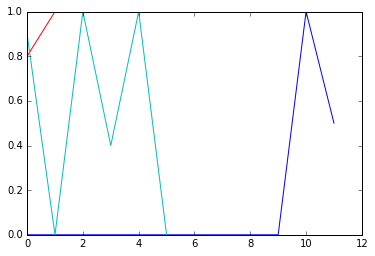

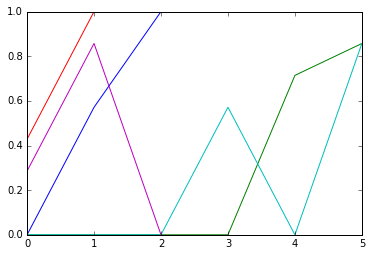

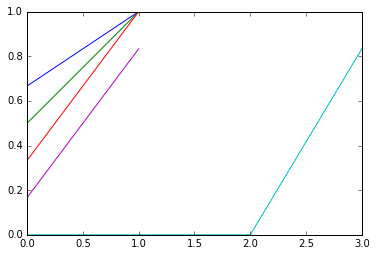

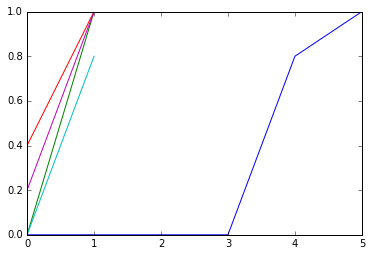

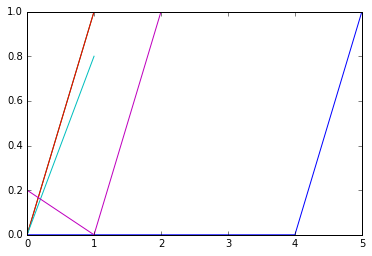

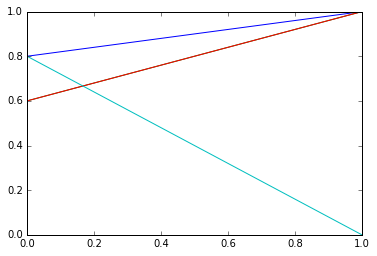

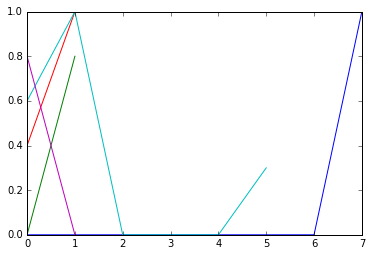

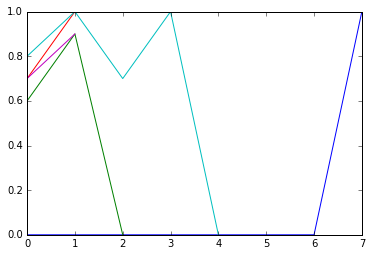

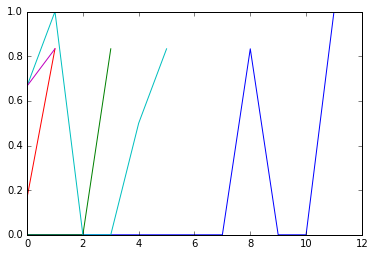

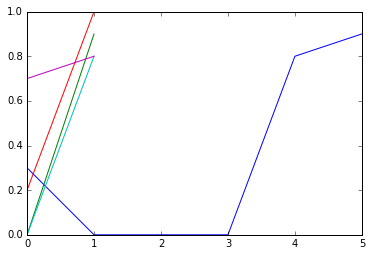

In [38]:
for capsule in list_capsule[10:]:
    fig = plt.figure()
    for user in list_users[:5]:
        plt.plot(global_dict[capsule][user])

In [39]:
df_ta_caps_user["is completed"] = df_ta_caps_user["is completed"].apply(lambda x: 1 if x==True else 0)
df_ta_caps_user["is succeeded"] = df_ta_caps_user["is succeeded"].apply(lambda x: 1 if x==True else 0)
df8 = df_ta_caps_user.groupby("user name").sum()
#df8.to_csv("nombre_comp_util")
df9 = df_ta_caps_user.groupby("capsule name").sum()
#(df9["is succeeded"] / df9["is completed"]).to_csv("va_t_il_marcher")

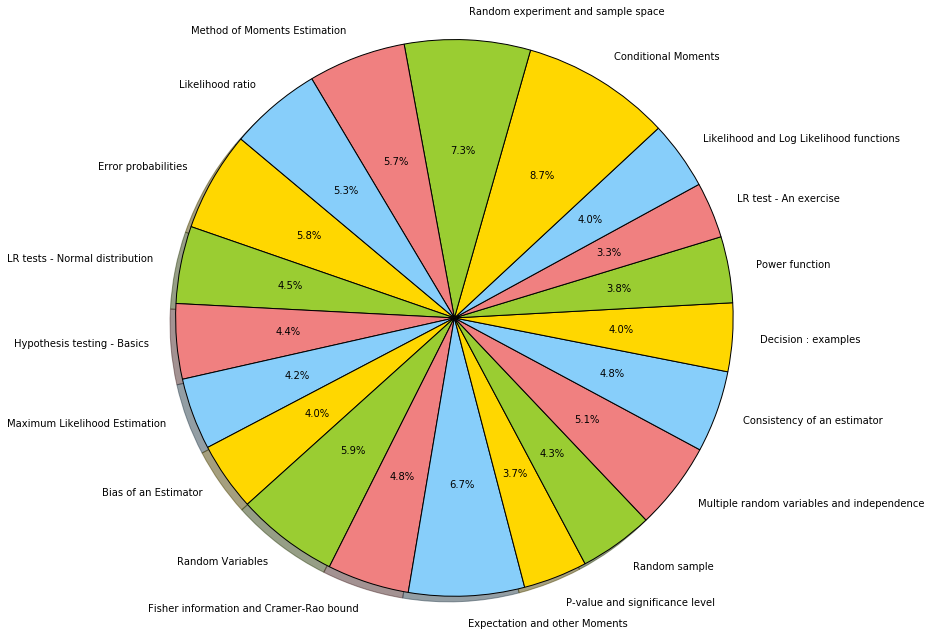

In [40]:
fig = plt.figure(figsize=[10,10])
sizes = dict(df_ta_caps_user["capsule name"].value_counts()).values()
labels = dict(df_ta_caps_user["capsule name"].value_counts()).keys()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes,labels=labels, colors=colors,  autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Let's Play with our Statements

# Question DataSet

In [41]:
def get_question_number(question):
    l = question.strip(']').split('[')
    n = len(l)
    return l[-1]

In [42]:
columns_questions = [
    "Capsule id",
    "date created",
    "date updated",
    "user id",
    "test attempt",
    "question number",
    "duration",
    "success"

]
arrays_questions = mon.query(
"newbase1", # database name
"statement", # collection name
{"verb.identifier": "http://adlnet.gov/expapi/verbs/answered",
"context.contextActivities.parent.object._ref.$id":{"$in":list_caps_prob_stat}}, # query spec
[
        "context.contextActivities.parent.0.object._ref.$id",
        "date_created",
        "date_updated",
        "actor.account.user",
        "object.definition.object._ref.$id",
        "object.definition.sub_element",
        "result.duration",
        "result.success"

], # field names (in Mongo record)
[
        "id",
        "date",
        "date",
        "id",
        "id",
        "string:100",
        "float32",
        "bool"
  
    ] # Monary field types (see below)
)
df_questions = np.matrix(arrays_questions).transpose() 

df_questions = pd.DataFrame(df_questions, columns=columns_questions)

In [43]:
df_questions["Capsule id"] = df_questions["Capsule id"].apply(mvoid_to_bson_id).astype("string")
df_questions["user id"]=df_questions["user id"].apply(mvoid_to_bson_id).astype("string")
df_questions["test attempt"]=df_questions["test attempt"].apply(mvoid_to_bson_id).astype("string")
df_questions["date updated"]=df_questions["date updated"].astype('int')
df_questions["date created"]=df_questions["date created"].astype('int')
df_questions["question number"]=df_questions["question number"].apply(get_question_number)
df_questions["success"]=df_questions["success"].apply(lambda x: 1 if x==True else 0)
df_questions["duration"]=df_questions["duration"].astype('float')

In [44]:
sorted(dict(df_questions["Capsule id"].apply(mvoid_to_bson_id).value_counts()).keys()) == sorted(list_caps_prob_stat)

False

# Export Base Questions

In [45]:
df_questions.to_csv("BaseQuestionsPSE")

In [46]:
df_questions

,Capsule id,date created,date updated,user id,test attempt,question number,duration,success
0,579632509288d4000b36ae66,1471860312922,1471860312932,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,0,5.127562,0
1,579632509288d4000b36ae66,1471860315971,1471860315991,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,1,2.364411,0
2,579632509288d4000b36ae66,1471962537644,1471962537656,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,0,17.119530,0
3,579632509288d4000b36ae66,1471962550835,1471962550851,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,1,11.182281,0
4,579632509288d4000b36ae66,1472020770719,1472020770731,57485ef0dfb7b83ecce1f01c,57bd40eb1a68b1000b1ac21c,0,55.220470,0
5,579632509288d4000b36ae66,1472020876693,1472020876700,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,0,10.999542,1
6,579632509288d4000b36ae66,1472021076795,1472021076808,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,1,168.382965,1
7,579632509288d4000b36ae66,1472021148468,1472021148475,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,2,56.591736,1
8,579632509288d4000b36ae66,1472021184524,1472021184539,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,3,25.226973,1
9,579632509288d4000b36ae66,1472021245199,1472021245208,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,4,9.726890,1


In [47]:
df = df_questions[df_questions.columns-["test attempt","user id"]]

/home/enguerand/.virtualenvs/gryzz-lab/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [48]:
df.head()

,Capsule id,date created,date updated,duration,question number,success
0,579632509288d4000b36ae66,1471860312922,1471860312932,5.127562,0,0
1,579632509288d4000b36ae66,1471860315971,1471860315991,2.364411,1,0
2,579632509288d4000b36ae66,1471962537644,1471962537656,17.119530,0,0
3,579632509288d4000b36ae66,1471962550835,1471962550851,11.182281,1,0
4,579632509288d4000b36ae66,1472020770719,1472020770731,55.220470,0,0


In [49]:
numerique = [ c for c,d in zip(df.columns,df.dtypes) if d == np.int64 and c not in ["success"] ]
categories = [ c for c in df.columns if c not in numerique and c not in ["success"] ]
target = "success"
num = df[ numerique ]
cat = df[ categories ]
tar = df[ target ]
prep = DictVectorizer()
cat_as_dicts = [dict(r.iteritems()) for _, r in cat.iterrows()]
temp = prep.fit_transform(cat_as_dicts)
cat_exp = temp.toarray()
cat_exp_df = pd.DataFrame( cat_exp, columns = prep.feature_names_ )
X = (pd.concat ( [ num, cat_exp_df ], axis= 1))
Y = (tar)

In [129]:
desc = pd.concat([X,Y],axis=1)
desc

,date created,date updated,Capsule id=57485297dfb7b83ecce16494,Capsule id=574852a9dfb7b83ecce16495,Capsule id=5748533edfb7b83ecce1656c,Capsule id=5748534adfb7b83ecce1656d,Capsule id=579632509288d4000b36ae66,Capsule id=579633069288d4000b36d9c0,Capsule id=579633209288d4000b36df6e,Capsule id=579633819288d4000b36eae5,...,question number=1,question number=2,question number=3,question number=4,question number=5,question number=6,question number=7,question number=8,question number=9,success
0,1471860312922,1471860312932,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1471860315971,1471860315991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1471962537644,1471962537656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1471962550835,1471962550851,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1472020770719,1472020770731,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1472020876693,1472020876700,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1472021076795,1472021076808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,1472021148468,1472021148475,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1472021184524,1472021184539,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,1472021245199,1472021245208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Un peu d'Analyse des données

## Corrélation des variables entre elles

In [130]:
from sklearn.decomposition import RandomizedPCA as PCA
pca = PCA(n_components=4)
x_transpose = desc.T
pca.fit(x_transpose)

RandomizedPCA(copy=True, iterated_power=3, n_components=4, random_state=None,
       whiten=False)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 16: ordinal not in range(128)

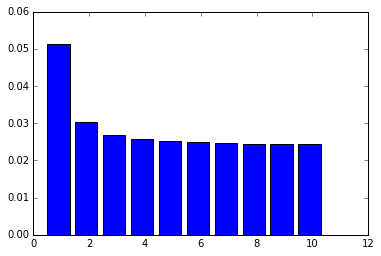

In [131]:
from sklearn.preprocessing import normalize
xtnorm = normalize(x_transpose)
pca = PCA(n_components=10)
pca.fit(xtnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

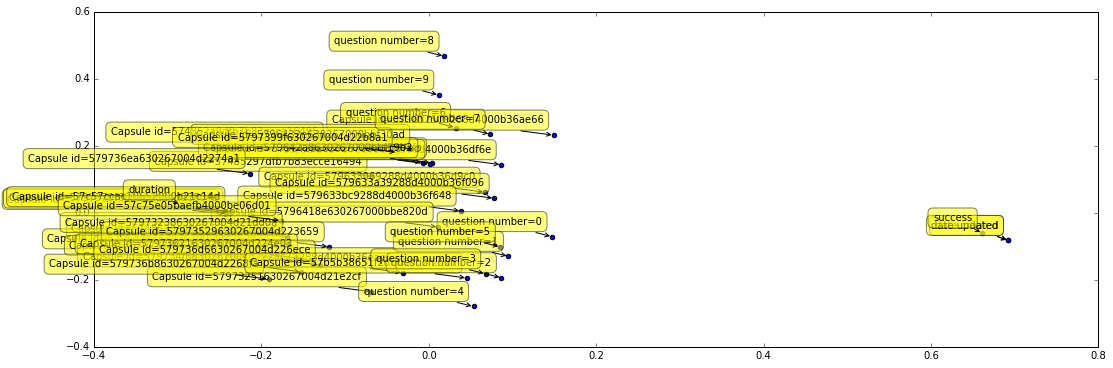

In [132]:
Xt_reduced = pca.transform(xtnorm)
plt.figure(figsize=(18,6))
plt.scatter(Xt_reduced[:, 0], Xt_reduced[:, 1])
for label, x, y in zip(x_transpose.index, Xt_reduced[:, 0], Xt_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

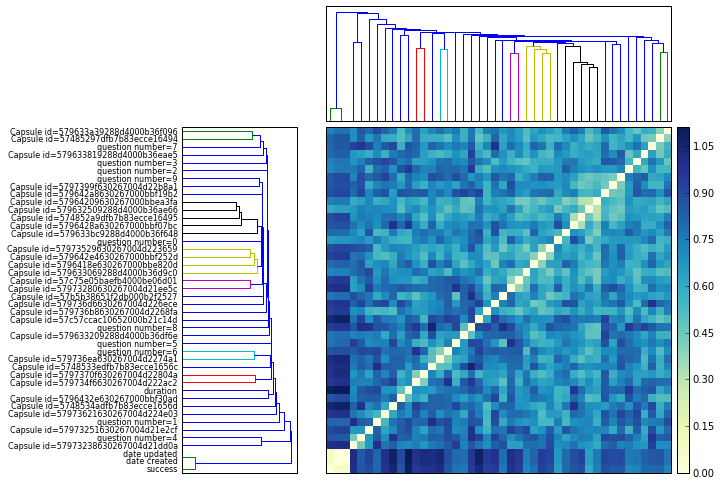

In [133]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from fastcluster import linkage
data_link = linkage(Xt_reduced, method='single', metric='euclidean', preserve_input=True)
data_dist = pdist(Xt_reduced)
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(data_link, orientation='right',labels=x_transpose.index)
ax1.set_xticks([])
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(data_link)
ax2.set_xticks([])
ax2.set_yticks([])
#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

In [16]:
Z1['leaves']

[10, 3, 11, 5, 12, 7, 6, 9, 2, 8, 4, 1, 0, 13]

## Corrélation des individus entre eux

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 16: ordinal not in range(128)

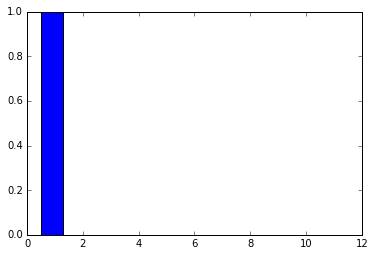

In [134]:
from sklearn.preprocessing import normalize
xnorm = normalize(desc)
pca = PCA(n_components=10)
pca.fit(xnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [135]:
X_reduced = pca.transform(xnorm)

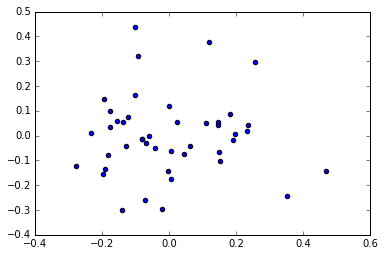

In [136]:
plt.scatter(Xt_reduced[:,1],Xt_reduced[:,2])

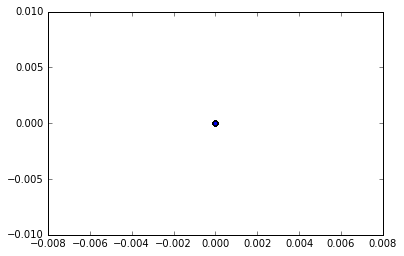

In [139]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])


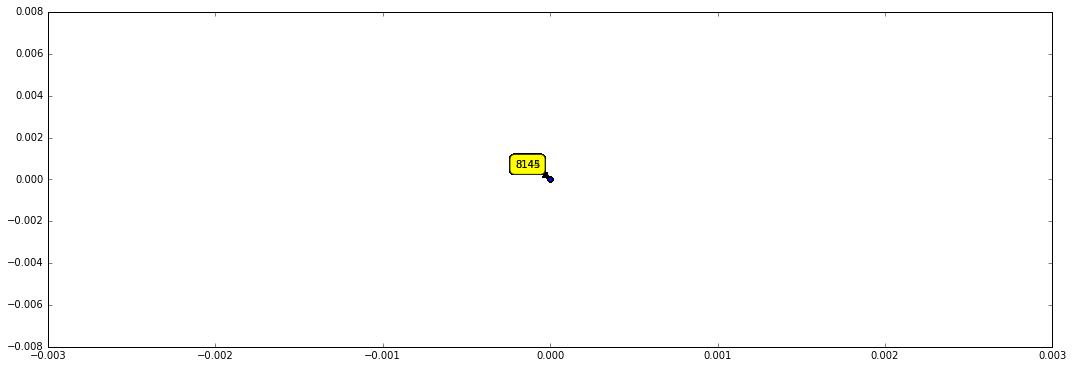

In [140]:
plt.figure(figsize=(18,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for label, x, y in zip(desc.index, X_reduced[:, 0], X_reduced[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

RuntimeError: maximum recursion depth exceeded

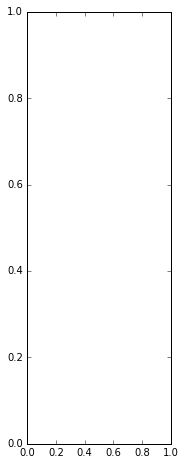

In [141]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from fastcluster import linkage
data_link = linkage(X_reduced, method='single', metric='euclidean', preserve_input=True)
data_dist = pdist(X_reduced)
fig = plt.figure(figsize=(10,10))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(data_link, orientation='right',labels=desc.index)
ax1.set_xticks([])
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(data_link)
ax2.set_xticks([])
ax2.set_yticks([])
#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

# Machine Learning


In [142]:
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 0)

In [143]:
from xgboost import XGBClassifier

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier


clf = Pipeline([
      ('normalize', Normalizer()),
      ('classifier', GradientBoostingClassifier(random_state = 1))
    ])
clf2 = XGBClassifier(missing=np.nan,gamma = 1.5, max_depth=30, n_estimators=350, learning_rate=0.01, nthread=30, subsample=0.95, colsample_bytree=0.90, seed=4242)
clf2 = clf2.fit(X_train, Y_train.ravel())

[[1017  275]
 [  23 3572]]
[[ 283  576]
 [ 231 2169]]


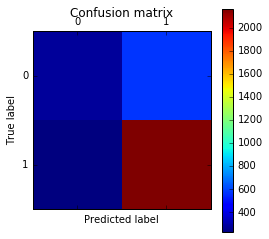

In [145]:
from sklearn.metrics import confusion_matrix
for x,y in [ (X_train, Y_train), (X_test, Y_test) ]:
    yp  = clf2.predict(x)
    cm = confusion_matrix(y.ravel(), yp.ravel())
    print(cm)
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
savefig("conf_mat1.png")

In [38]:
cm

array([[1523,  727],
       [ 511, 1949]])

In [146]:
from sklearn import metrics
metrics.classification_report(Y_test,clf2.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.55      0.33      0.41       859\n          1       0.79      0.90      0.84      2400\n\navg / total       0.73      0.75      0.73      3259\n'

In [147]:
from sklearn.metrics import roc_curve, auc
probas = clf2.predict_proba(X_test)
probas[:5]

array([[ 0.04812944,  0.95187056],
       [ 0.43167889,  0.56832111],
       [ 0.1402362 ,  0.8597638 ],
       [ 0.15312207,  0.84687793],
       [ 0.05346519,  0.94653481]], dtype=float32)

In [148]:
rep = [ ]
yt = Y_test.ravel()
for i in range(probas.shape[0]):
    p0,p1 = probas[i,:]
    exp = yt[i]
    if p0 > p1 :
        if exp == 0 :
            # bonne réponse
            rep.append ( (1, p0) )
        else :
            # mauvaise réponse
            rep.append( (0,p0) )
    else :
        if exp == 0 :
            # mauvaise réponse
            rep.append ( (0, p1) )
        else :
            # bonne réponse
            rep.append( (1,p1) )
mat_rep = numpy.array(rep)
mat_rep[:5]
mat_rep

array([[ 1.        ,  0.95187056],
       [ 0.        ,  0.56832111],
       [ 1.        ,  0.8597638 ],
       ..., 
       [ 1.        ,  0.68820482],
       [ 1.        ,  0.94669646],
       [ 0.        ,  0.64975202]])

In [149]:
"taux de bonne réponse",sum(mat_rep[:,0]/len(mat_rep)) # voir matrice de confusion

('taux de bonne r\xc3\xa9ponse', 0.75237803007057391)

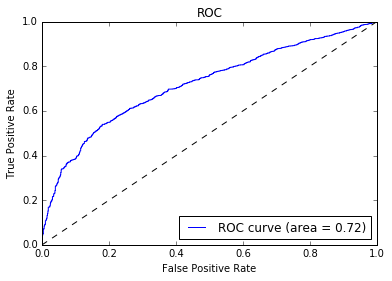

In [150]:
fpr, tpr, thresholds = roc_curve(mat_rep[:,0], mat_rep[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
savefig("ROC.png")

# Amélioration de la base

## Import des bases de données


In [50]:
df_capsule = pd.read_csv("BaseCapsule", index_col=0)
df_user = pd.read_csv("BaseUtilisateurs",index_col=0)
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_questions = pd.read_csv("BaseQuestions",index_col=0)


In [51]:
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_test_attempt = df_test_attempt.rename(columns={'Test Attempt id':'test attempt'})[['test attempt','is completed','is succeeded','score']]
df_test_attempt

,test attempt,is completed,is succeeded,score
0,57288acd0a728f7346c5567c,True,True,1.000000
1,564dc8680a728f755ac642b9,True,False,1.000000
2,564dc8e60a728f755ac64334,False,False,0.000000
3,564dc8e60a728f755ac64341,True,False,1.000000
4,564dc90d0a728f7559e66b53,False,False,0.000000
5,564dc90d0a728f755ac643ad,True,False,1.000000
6,564dca210a728f7559e66c60,True,False,1.000000
7,564f33430a728f02c3d0278b,False,False,0.000000
8,564f33430a728f02c4f1be82,False,False,0.000000
9,57286b350a728f6f1756889c,False,False,0.000000


In [52]:
df_questions_user = pd.merge(left=df_user,right=df_questions,on="user id",how ='inner')

In [53]:
df_questions_user_capsule = pd.merge(left=df_capsule,right=df_questions_user,on="Capsule id",how ='inner')

In [54]:
df_user = df_user.rename(columns={'user id': 'author user id','user name':'author user name'})

In [55]:
df_questions_user_author_capsule = pd.merge(left=df_user[["author user id","author user name"]],right=df_questions_user_capsule,on="author user id",how ='inner')

In [56]:
df = pd.merge(left=df_test_attempt,right=df_questions_user_author_capsule,on="test attempt",how='inner')
df["is completed"]=df["is completed"].apply(lambda x: 1 if x==True else 0)
df["is succeeded"]=df["is succeeded"].apply(lambda x: 1 if x==True else 0)

In [57]:
df["is user author"] = (df["author user id"] == df["user id"]).apply(lambda x: 1 if x==True else 0)

In [58]:
df.to_csv("BaseFinale")

# Commencer ici

In [59]:
df = pd.read_csv("BaseFinale",index_col=0)

# Base de travail

In [60]:
new_columns = [
    "is completed",
    "is succeeded",
    "score",
    "type of author",
    "is draft",
    "is public",
    'approximate capsule duration',
    "date joined",
    "date created",
    "date updated",
    "question number",
    "duration",
    "success",
    "is user author"
]
df = df[new_columns]
df.head()

,is completed,is succeeded,score,type of author,is draft,is public,approximate capsule duration,date joined,date created,date updated,question number,duration,success,is user author
0,1,1,1.0,user,1,0,0.0,1454539430147,1467817861110,1467817861130,0,30.591999,1,1
1,1,1,1.0,user,1,0,0.0,1454539430147,1467817861140,1467817861143,1,23.615999,1,1
2,1,1,1.0,user,1,0,0.0,1454539430147,1467818354705,1467818354724,0,30.591999,1,1
3,1,1,1.0,user,1,0,0.0,1454539430147,1467818354734,1467818354737,1,23.615999,1,1
4,1,0,1.0,user,0,0,600.0,1448059402000,1467817860588,1467817860633,0,5.590000,1,0


# Traitement Base de Données

In [136]:
df_infos = pd.read_csv("BaseQuestionsPSE",index_col=0)
df_map_name = pd.read_csv("BaseMapPSE",index_col=0)
df_capsule = pd.read_csv("BaseCapsulePSE",index_col=0)

In [137]:
df_questions = pd.merge(left=df_infos,right=df_map_name,on="Capsule id")
df_questions.to_csv("BaseQuestionsNomsPSE")
properties = df_questions[df_questions["map name"] == "1.1. Properties of random samples"]
properties = pd.merge(left=properties,right=df_capsule,on="Capsule id")

In [73]:
df_questions

,Capsule id,date created,date updated,user id,test attempt,question number,duration,success,map name
0,579632509288d4000b36ae66,1471860312922,1471860312932,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,0,5.127562,0,1. Properties of random samples
1,579632509288d4000b36ae66,1471860315971,1471860315991,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,1,2.364411,0,1. Properties of random samples
2,579632509288d4000b36ae66,1471962537644,1471962537656,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,0,17.119530,0,1. Properties of random samples
3,579632509288d4000b36ae66,1471962550835,1471962550851,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,1,11.182281,0,1. Properties of random samples
4,579632509288d4000b36ae66,1472020770719,1472020770731,57485ef0dfb7b83ecce1f01c,57bd40eb1a68b1000b1ac21c,0,55.220470,0,1. Properties of random samples
5,579632509288d4000b36ae66,1472020876693,1472020876700,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,0,10.999542,1,1. Properties of random samples
6,579632509288d4000b36ae66,1472021076795,1472021076808,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,1,168.382965,1,1. Properties of random samples
7,579632509288d4000b36ae66,1472021148468,1472021148475,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,2,56.591736,1,1. Properties of random samples
8,579632509288d4000b36ae66,1472021184524,1472021184539,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,3,25.226973,1,1. Properties of random samples
9,579632509288d4000b36ae66,1472021245199,1472021245208,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,4,9.726890,1,1. Properties of random samples


In [79]:
mvoid_to_bson_id(df_map[2,3])

ObjectId('080000000000000090f7d5eb')

In [12]:
pd.read_csv("BaseQuestionsNomsPSE",index_col=0)

,Capsule id,date created,date updated,user id,test attempt,question number,duration,success,map name
0,579632509288d4000b36ae66,1471860312922,1471860312932,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,0,5.127562,0,1.1. Properties of random samples
1,579632509288d4000b36ae66,1471860315971,1471860315991,564f68e80a728f08a779fe6e,57bace537fc49a000bd84221,1,2.364411,0,1.1. Properties of random samples
2,579632509288d4000b36ae66,1471962537644,1471962537656,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,0,17.119530,0,1.1. Properties of random samples
3,579632509288d4000b36ae66,1471962550835,1471962550851,564f68e80a728f08a779fe6e,57bc5d981a68b1000b171473,1,11.182281,0,1.1. Properties of random samples
4,579632509288d4000b36ae66,1472020770719,1472020770731,57485ef0dfb7b83ecce1f01c,57bd40eb1a68b1000b1ac21c,0,55.220470,0,1.1. Properties of random samples
5,579632509288d4000b36ae66,1472020876693,1472020876700,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,0,10.999542,1,1.1. Properties of random samples
6,579632509288d4000b36ae66,1472021076795,1472021076808,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,1,168.382965,1,1.1. Properties of random samples
7,579632509288d4000b36ae66,1472021148468,1472021148475,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,2,56.591736,1,1.1. Properties of random samples
8,579632509288d4000b36ae66,1472021184524,1472021184539,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,3,25.226973,1,1.1. Properties of random samples
9,579632509288d4000b36ae66,1472021245199,1472021245208,57485ef0dfb7b83ecce1f01c,57bd41811a68b1000b1aed86,4,9.726890,1,1.1. Properties of random samples


In [9]:
12714*9

114426

In [30]:
list_capsules = dict(properties['capsule name'].value_counts()).keys()

In [86]:
properties.groupby(["test attempt"]).first()

,capsule name,map name,user id,question number,success,user id
test attempt,,,,,,
57bace537fc49a000bd84221,Random experiment and sample space,1.1. Properties of random samples,564f68e80a728f08a779fe6e,0,0,564f68e80a728f08a779fe6e
57bc5d981a68b1000b171473,Random experiment and sample space,1.1. Properties of random samples,564f68e80a728f08a779fe6e,0,0,564f68e80a728f08a779fe6e
57bd40eb1a68b1000b1ac21c,Random experiment and sample space,1.1. Properties of random samples,57485ef0dfb7b83ecce1f01c,0,0,57485ef0dfb7b83ecce1f01c
57bd41811a68b1000b1aed86,Random experiment and sample space,1.1. Properties of random samples,57485ef0dfb7b83ecce1f01c,0,1,57485ef0dfb7b83ecce1f01c
57bd44041a68b1000b1b0c38,Random experiment and sample space,1.1. Properties of random samples,57485ef0dfb7b83ecce1f01c,0,0,57485ef0dfb7b83ecce1f01c
57bd44101a68b1000b1b0cc2,Random experiment and sample space,1.1. Properties of random samples,57485ef0dfb7b83ecce1f01c,0,1,57485ef0dfb7b83ecce1f01c
57bd44131a68b1000b1b0d00,Random experiment and sample space,1.1. Properties of random samples,5762d0afdfb7b870f9ae71de,0,1,5762d0afdfb7b870f9ae71de
57bd44f31a68b1000b1b2b86,Random Variables,1.1. Properties of random samples,5762d0afdfb7b870f9ae71de,0,1,5762d0afdfb7b870f9ae71de
57bd450d1a68b1000b1b2e9c,Random experiment and sample space,1.1. Properties of random samples,57485ef0dfb7b83ecce1f01c,0,1,57485ef0dfb7b83ecce1f01c


In [138]:
properties=properties[["capsule name", 'test attempt', "map name", "question number", "success", "user id"]]
list_answers_test = {}
forbidden_test_attempt = []
for capsule in list_capsules:
    right_capsule = properties["capsule name"] == capsule
    number_question = max(properties[right_capsule]["question number"])+1
    every_q = (properties["question number"]) == number_question-1 
    #test_attempts = set(properties[right_capsule][every_q]["test attempt"])
    test_attempts = []
    for user in set(properties[right_capsule]["user id"]):
        try:
            test_attempts.append(properties[right_capsule][every_q][properties["user id"] == user]["test attempt"].reset_index(drop=True)[0])
        except:
            test_attempts += []
    forbidden_test_attempt += test_attempts
    number_test_attempts = len(test_attempts)
    list_answers_test[capsule] = np.zeros((number_test_attempts, number_question))
    for (index, test_attempt) in enumerate(test_attempts):
        right_test_attempt = properties["test attempt"] == test_attempt
        for i in range(number_question):
            right_question = properties["question number"] == i
            list_answers_test[capsule][index][i] = list(properties[right_capsule][right_test_attempt][right_question]["success"])[0]


/home/enguerand/.virtualenvs/gryzz-lab/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/enguerand/.virtualenvs/gryzz-lab/lib/python2.7/site-packages/ipykernel/__main__.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [157]:
set([1,2])-set([3])

{1, 2}

In [162]:

list_answers = {}
for capsule in list_capsules:
    right_capsule = properties["capsule name"] == capsule
    number_question = max(properties[right_capsule]["question number"])+1
    every_q = (properties["question number"]) == number_question-1 
    test_attempts = set(properties[right_capsule][every_q]["test attempt"])
    number_test_attempts = len(test_attempts)
    list_answers[capsule] = np.zeros((number_test_attempts, number_question))
    for (index, test_attempt) in enumerate(test_attempts):
        right_test_attempt = properties["test attempt"] == test_attempt
        for i in range(number_question):
            right_question = properties["question number"] == i
            list_answers[capsule][index][i] = list(properties[right_capsule][right_test_attempt][right_question]["success"])[0]


/home/enguerand/.virtualenvs/gryzz-lab/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/enguerand/.virtualenvs/gryzz-lab/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [163]:
number_users = min([len(a) for a in list_answers.values()])
list_answers_final = list_answers

In [165]:
list_answers_final_num = {}
list_answers_final_test = {}

list_answers_final_num[0] = list_answers["Random experiment and sample space"]
list_answers_final_num[1] = list_answers["Random Variables"]
list_answers_final_num[2] = list_answers["Multiple random variables and independence"]
list_answers_final_num[3] = list_answers["Expectation and other Moments"]
list_answers_final_num[4] = list_answers["Conditional distributions"]
list_answers_final_num[5] = list_answers["Conditional Moments"]
list_answers_final_num[6] = list_answers["Random sample"]

list_answers_final_test[0] = list_answers_test["Random experiment and sample space"][:10]
list_answers_final_test[1] = list_answers_test["Random Variables"][:10]
list_answers_final_test[2] = list_answers_test["Multiple random variables and independence"][:10]
list_answers_final_test[3] = list_answers_test["Expectation and other Moments"][:10]
list_answers_final_test[4] = list_answers_test["Conditional distributions"][:10]
list_answers_final_test[5] = list_answers_test["Conditional Moments"][:10]
list_answers_final_test[6] = list_answers_test["Random sample"][:10]

In [40]:
list_answers_final_num_train = {}
list_answers_final_num_test = {}
for i in range(7):
    list_answers_final_num_train[i] = list_answers_final_num[i][:-10]
    list_answers_final_num_test[i] = list_answers_final_num[i][-10:]

In [166]:
import pickle
output = open('/home/enguerand/Documents/ENSAE/2A /Césure/Gryzz-Lab/Data Analysis/Placement test/IRT/list_answers_final_num_train.pkl', 'wb')

pickle.dump(list_answers_final_num, output)
output.close()

output = open('/home/enguerand/Documents/ENSAE/2A /Césure/Gryzz-Lab/Data Analysis/Placement test/IRT/list_answers_final_num_test.pkl', 'wb')
pickle.dump(list_answers_final_test, output)
output.close()


In [108]:
pkl_file = open('list_answers_final_num.pkl', 'rb')

data1 = pickle.load(pkl_file)
(data1)

{0: array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  0.

In [107]:
pkl_file.close()